In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from pandas_profiling import ProfileReport

warnings.filterwarnings("ignore", category=UserWarning)

# Explanatory Data Analysis

## Data Analysis with Pandas Profiling

In [ ]:
df = pd.read_csv('input/cybersecurity_training.csv', sep='|')
report = ProfileReport(df, title='Profiling Report')
report.to_file(output_file='output/report_suspicious_network_event_recognition')

In [ ]:
pd.set_option("display.max_columns",50)

In [ ]:
data = pd.read_csv('input/localized_alerts_data.csv', sep='|', low_memory=False)

In [ ]:
features_num = data.select_dtypes('number').columns.tolist()
data[features_num] = data.select_dtypes('number').applymap(np.float64)
data.head()

In [ ]:
report_data = ProfileReport(data, title='Profiling Report', correlations={
    "pearson": {"calculate": True},
    "spearman": {"calculate": True},
    "kendall": {"calculate": True},
    "phi_k": {"calculate": False},
    "cramers": {"calculate": True},
} )
report_data.to_file(output_file='output/reports/report_localized_alerts_data')

In [ ]:
# report.to_widgets()
# report.to_notebook_iframe()

## Preparations

In [ ]:
# Trying to analyze cybersecurity_training and cybersecurity_test datasets
df_train = pd.read_csv('input/cybersecurity_training.csv', sep='|', index_col=0)
df_test = pd.read_csv('input/cybersecurity_test.csv', sep='|', index_col=0)
print(df_train.shape)
print(df_test.shape)
df_full = pd.concat([df_train, df_test])
df_full.info()

From this information we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as `n1` and `n2`). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove the features with 30% or more `NaN` values.

In [ ]:
df = df_train[[column for column in df_full if df_train[column].count() / len(df_train) >= 0.7]]
print("List of dropped columns:", end=" ")
for c in df_train.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
df_train = df

## Numerical data distribution

For this part lets look at the distribution of all the features by plotting them.

To do so lets first list all the types of our data from our dataset and take only the numerical ones:

In [ ]:
list(set(df.dtypes.tolist()))

In [ ]:
df_num = df.select_dtypes(include='int64')
df_num.head()

Now lets plot all of them:

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

### Correlation

Now we'll try to find which features are correlated with `notified`. We'll store them in a var called `golden_features_list`. We'll reuse our `df_num` dataset to do so.

In [ ]:
df_train_num = df_train.select_dtypes(include='int64')
df_num_corr = df_train_num.corr()['notified']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.07].sort_values(ascending=False)
print(f"There is {len(golden_features_list)-1} correlated numeric variables with 'notified':\n{golden_features_list[1:]}")

In [ ]:
for i in range(1, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+5],
                 y_vars=['notified'])
plt.show()

## Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

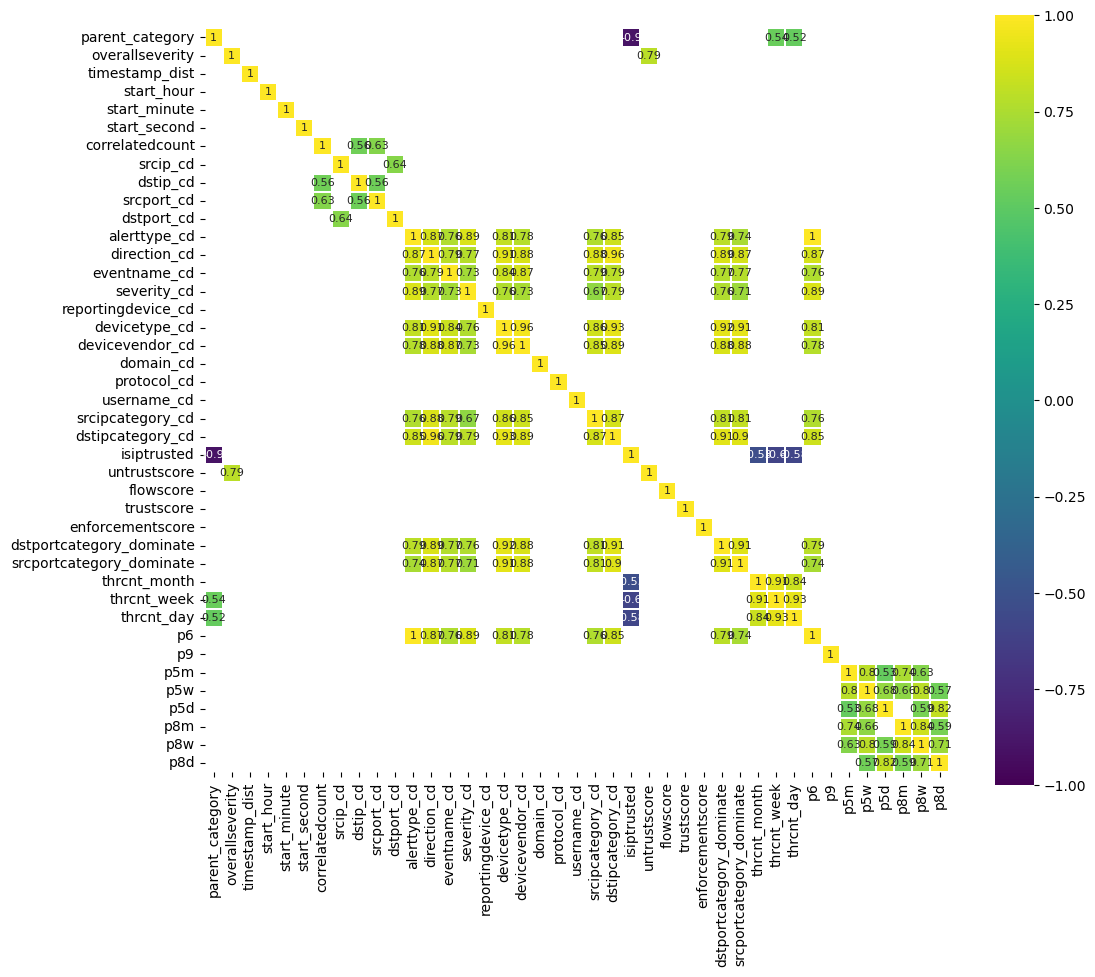

In [50]:
corr = df_num.drop('notified', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.show()

A lot of features seems to be correlated between each other.